In [1]:
from multi_layer_control import test_compare
import config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shapes = ['o', 's', '^']  # 圆形、方形、三角形
colors = ['red', 'green', 'blue']

In [3]:
n = 3000
all_results = []
for i in range(20):
    all_results += test_compare(n)
    print("=" * 20)

pre_intersection_size: 119 intersection_size: 277
pre_union_size: 1155 union_size: 997
start:	union size: 1155	intersetion size: 119
end:	union size: 995	intersetion size: 279
start:	union size: 1155	intersetion size: 119
end:	union size: 995	intersetion size: 279


pre_intersection_size: 130 intersection_size: 275
pre_union_size: 1144 union_size: 999
start:	union size: 1144	intersetion size: 130
end:	union size: 995	intersetion size: 279
start:	union size: 1144	intersetion size: 130
end:	union size: 996	intersetion size: 278


pre_intersection_size: 130 intersection_size: 273
pre_union_size: 1144 union_size: 1001
start:	union size: 1144	intersetion size: 130
end:	union size: 996	intersetion size: 278
start:	union size: 1144	intersetion size: 130


KeyboardInterrupt: 

In [11]:
reuslts = [_ for _ in all_results[0::2]]
elapsed_time = [_ for _ in all_results[1::2]]

[[1.2109394073486328, 0.6056771278381348, 17.691389799118042],
 [1.6297190189361572, 0.6131978034973145, 15.926034688949585],
 [1.599452018737793, 0.5839033126831055, 15.395475149154663],
 [1.720705270767212, 0.599801778793335, 15.787626028060913],
 [1.2344231605529785, 0.5959703922271729, 16.947367906570435],
 [1.604433536529541, 0.628291130065918, 15.251616954803467],
 [1.7026679515838623, 0.6024656295776367, 15.141630172729492],
 [1.5746774673461914, 0.5881145000457764, 16.30845284461975],
 [1.2254459857940674, 0.6028127670288086, 14.888327360153198],
 [1.6789398193359375, 0.5819194316864014, 16.058813095092773],
 [1.6062440872192383, 0.5950198173522949, 14.33949589729309],
 [1.644486665725708, 0.5572106838226318, 16.625559091567993],
 [1.5968661308288574, 0.5621755123138428, 16.429661989212036],
 [1.242642879486084, 0.6085045337677002, 17.074491500854492],
 [1.5661873817443848, 0.5680317878723145, 14.381860971450806],
 [1.664247751235962, 0.6182708740234375, 15.586601257324219],
 [

In [12]:
import plotly.graph_objects as go
# 分离两个算法的数据
mds_size_algo1 = [_[0][3] for _ in reuslts]
mds_size_algo2 = [_[1][3] for _ in reuslts]
mds_size_algo3 = [_[2][3] for _ in reuslts]
elapsed_time_algo1 = [_[0] for _ in elapsed_time]
elapsed_time_algo2 = [_[1] for _ in elapsed_time]
elapsed_time_algo3 = [_[2] for _ in elapsed_time]

# 创建数据框
df_mss = pd.DataFrame({
    'origin_algorithm': mds_size_algo1,
    'old_algorithm': mds_size_algo2,
    'latest_algorithm': mds_size_algo3
})

df_time = pd.DataFrame({
    'origin_algorithm': elapsed_time_algo1,
    'old_algorithm': elapsed_time_algo2,
    'latest_algorithm': elapsed_time_algo3,
})

for df in [df_mss, df_time]:
    fig = go.Figure()
    for col_name in df.columns:
        fig.add_trace(go.Scatter(y=df[col_name], mode="lines+markers", name=col_name))
    fig.show()

In [6]:
with open("assets/result/diff_n.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

type     n    k  seq  MDS1  MDS2  pre_intersection  intersection  \
0      ER+ER   500  1.0    0   234   223                99           122   
1      BA+BA   500  1.0    0   268   260               150           172   
2      ER+BA   500  1.0    0   234   268               130           158   
3      ER+ER   500  1.0    1   234   223               100           122   
4      BA+BA   500  1.0    1   268   260               144           172   
...      ...   ...  ...  ...   ...   ...               ...           ...   
12775  BA+BA  3000  8.0    8    18    18                 0             2   
12776  ER+BA  3000  8.0    8     4    18                 0             2   
12777  ER+ER  3000  8.0    9     4     2                 0             0   
12778  BA+BA  3000  8.0    9    18    18                 0             2   
12779  ER+BA  3000  8.0    9     4    18                 0             2   

       pre_union  union  
0            358    335  
1            378    356  
2            372    344  
3            357    335  
4            384    356  
...          ...    ...  
12775         36     34  
12776         22     20  
12777          6      6  
12778         36     34  
12779         22     20  

[12780 rows x 10 columns]

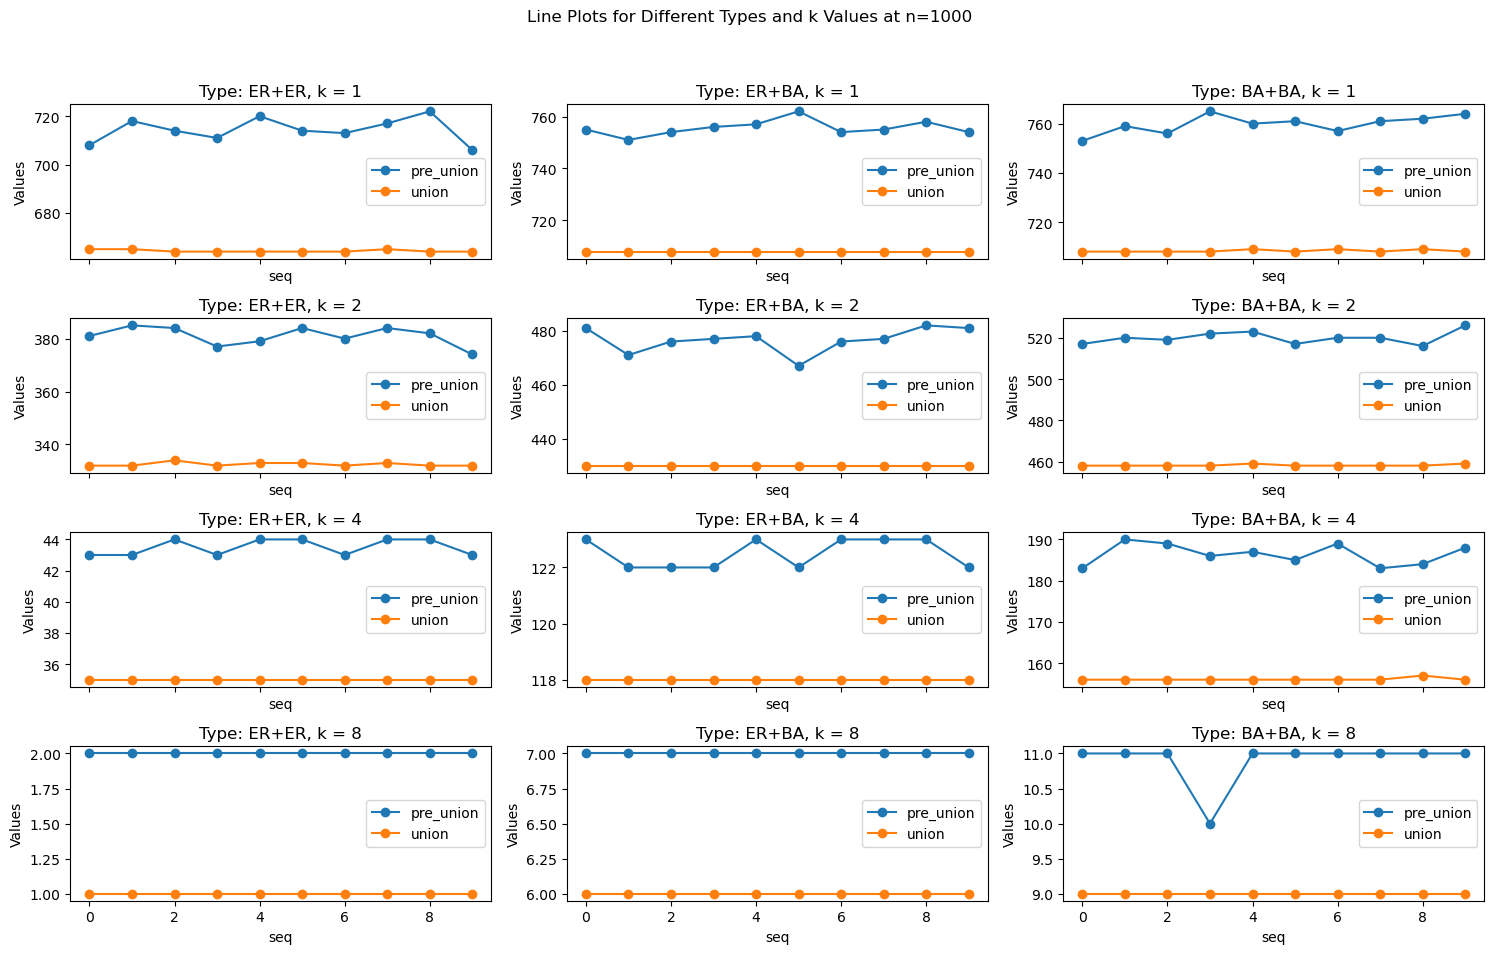

In [ ]:
# Extracting unique values for type and k for subplot organization
types = ['ER+ER', 'ER+BA', 'BA+BA']
k_values = [1, 2, 4, 8]

filtered_data = df[(df['n'] == 1000) & (df['k'].isin(k_values))]

# Creating subplots for each type and k
fig, axs = plt.subplots(len(k_values), len(types), figsize=(15, 10), sharex=True, sharey=False)
fig.suptitle('Line Plots for Different Types and k Values at n=1000')

for i, k_val in enumerate(k_values):
    for j, type_val in enumerate(types):
        # Selecting relevant data for the current type and k
        subset = filtered_data[(filtered_data['type'] == type_val) & (filtered_data['k'] == k_val)]

        # Plotting lines for pre_union and union
        axs[i, j].plot(subset['seq'], subset['pre_union'], label='pre_union', marker='o')
        axs[i, j].plot(subset['seq'], subset['union'], label='union', marker='o')

        # Setting labels and title for each subplot
        axs[i, j].set_title(f'Type: {type_val}, k = {k_val}')
        axs[i, j].set_xlabel('seq')
        axs[i, j].set_ylabel('Values')

        # Adding legend
        axs[i, j].legend()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


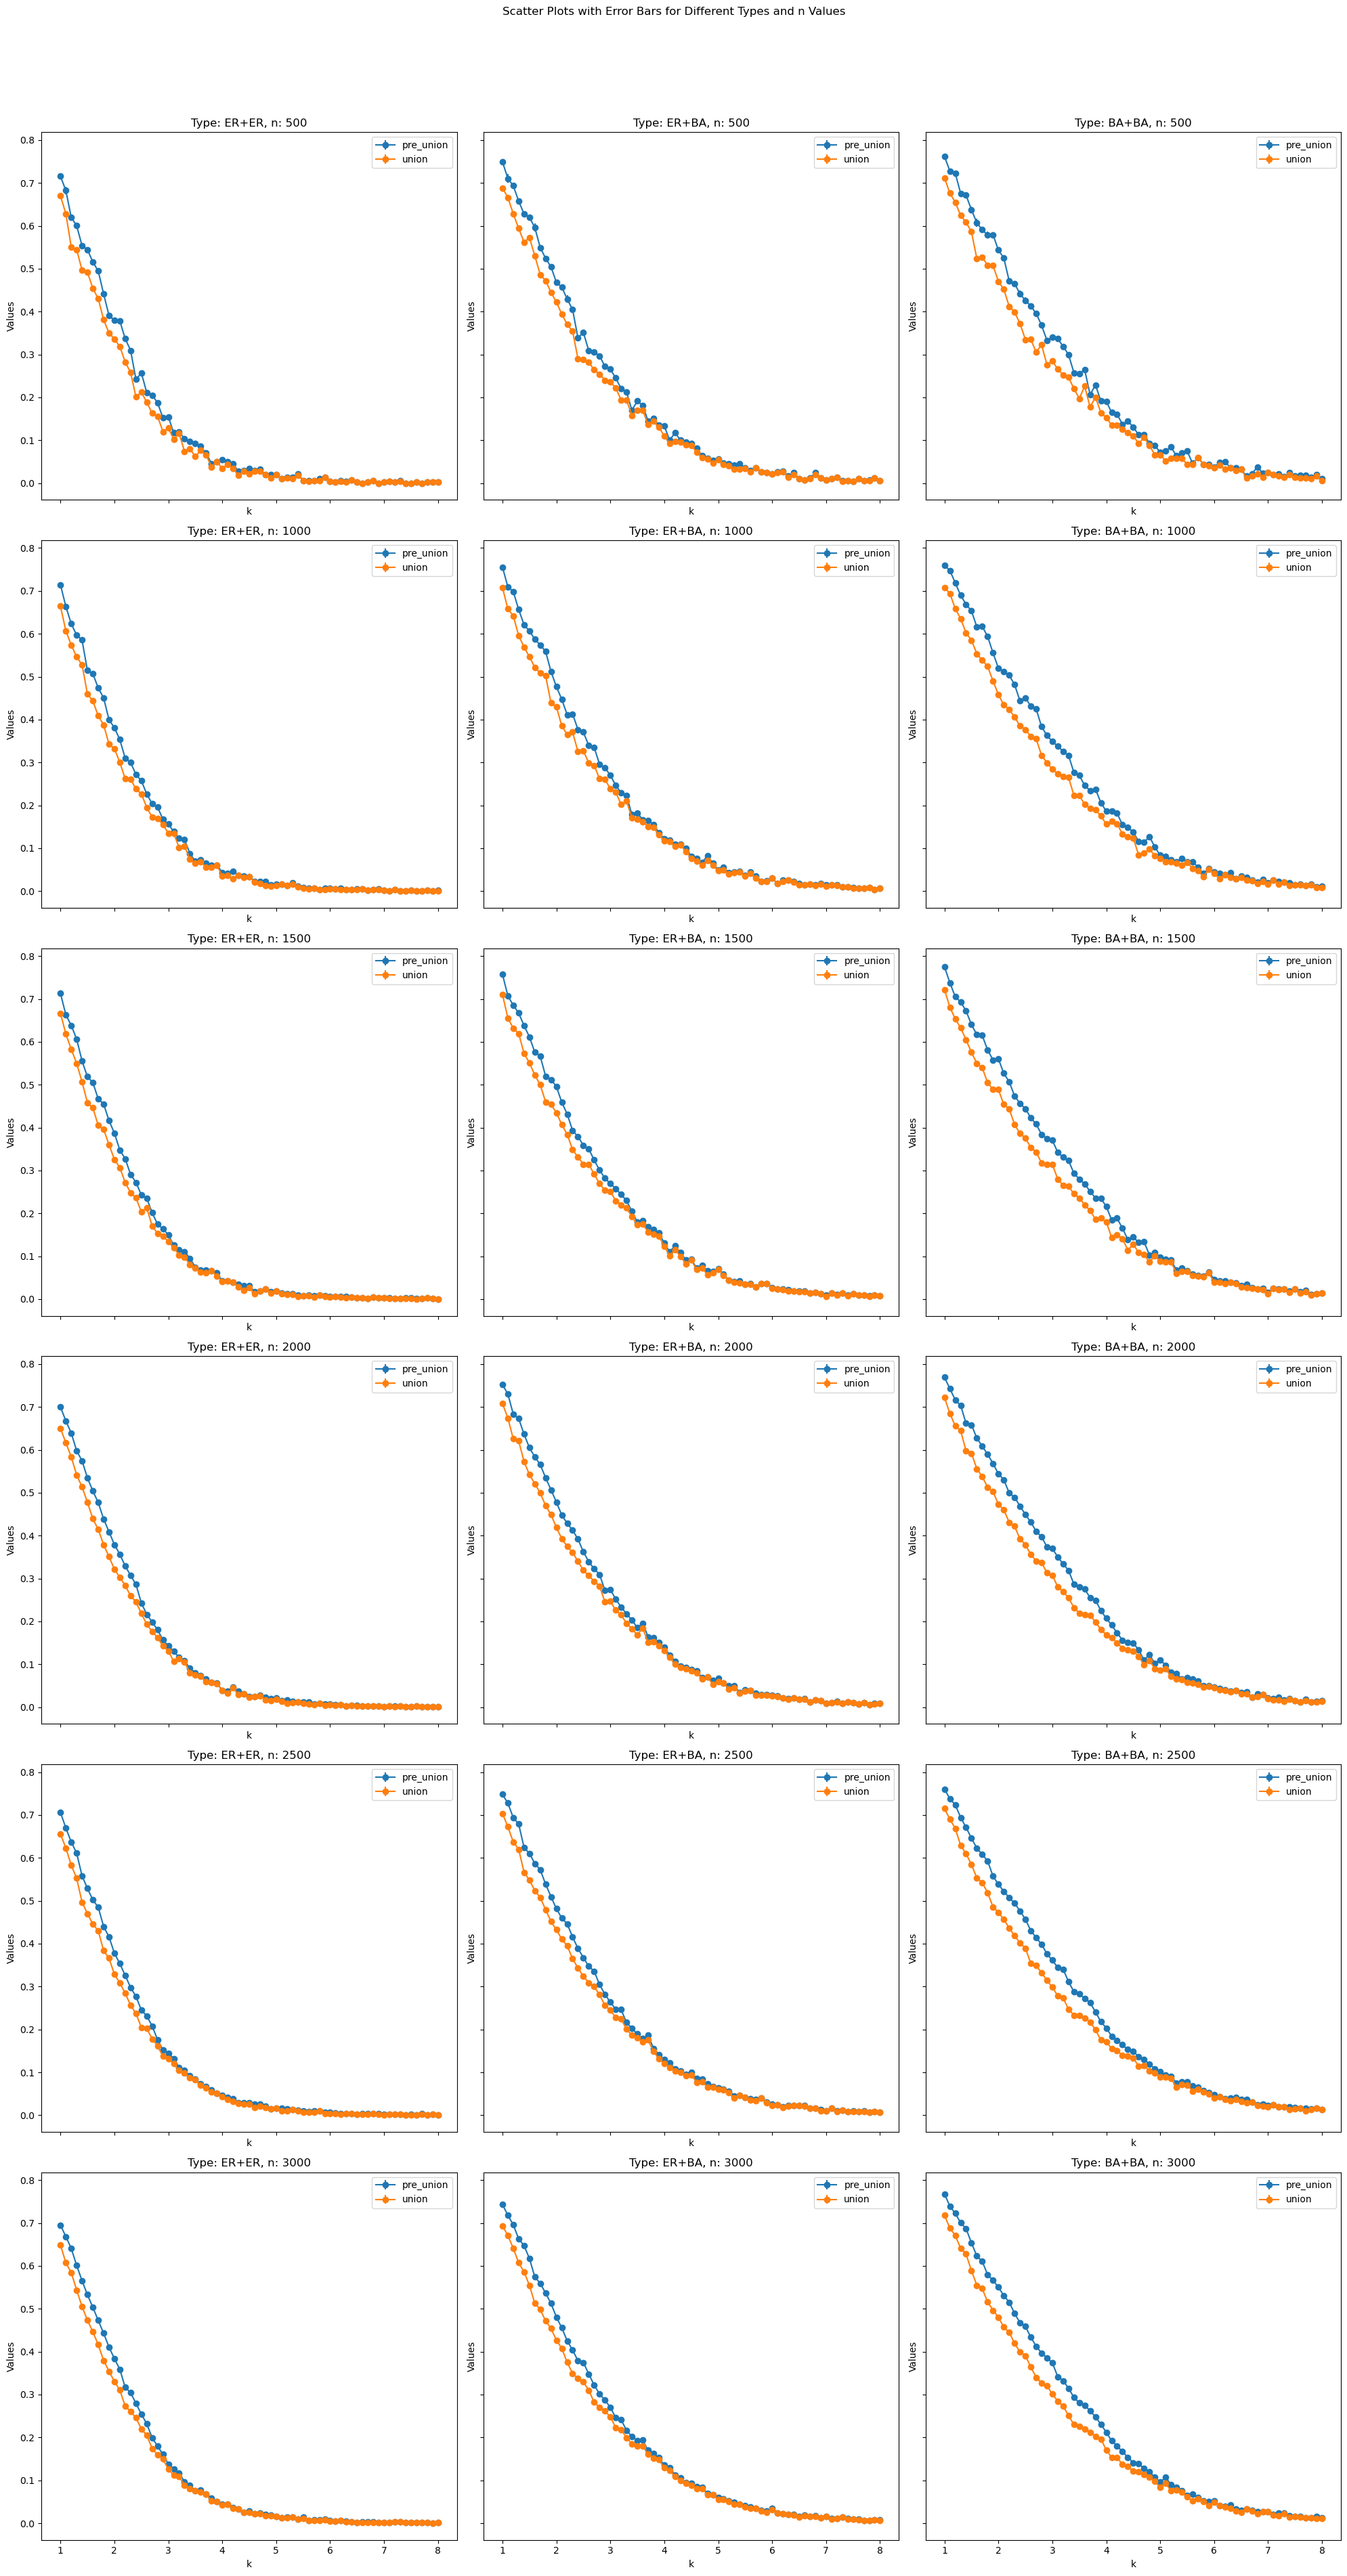

In [ ]:
df["n_d0"] = df["pre_union"] / df["n"]
df["n_d"] = df["union"] / df["n"]

filtered_data = df[df['n'] == 1000]
# Grouping data by type, n, and k to calculate mean and standard deviation for pre_union and union
grouped_data = df.groupby(['type', 'n', 'k']).agg({'n_d0': ['mean', 'std'], 'n_d': ['mean', 'std']}).reset_index()

# Extracting unique values for type and n for subplot organization
types = ['ER+ER', 'ER+BA', 'BA+BA']
n_values = df['n'].unique()

# Creating subplots for each type and n
fig, axs = plt.subplots(len(n_values), len(types), figsize=(20, 40), sharex=True, sharey=True)
fig.suptitle('Scatter Plots with Error Bars for Different Types and n Values')

for i, n_val in enumerate(n_values):
    for j, type_val in enumerate(types):
        # Selecting relevant data for the current type and n
        subset = grouped_data[(grouped_data['type'] == type_val) & (grouped_data['n'] == n_val)]

        # Plotting lines with error bars for pre_union and union
        axs[i, j].errorbar(subset['k'], subset['n_d0']['mean'], yerr=subset['n_d0']['std'], label='pre_union', fmt='-o')
        axs[i, j].errorbar(subset['k'], subset['n_d']['mean'], yerr=subset['n_d']['std'], label='union', fmt='-o')

        # Setting labels and title for each subplot
        axs[i, j].set_title(f'Type: {type_val}, n = {n_val}')
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel('Values')

        # Adding legend
        axs[i, j].legend()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


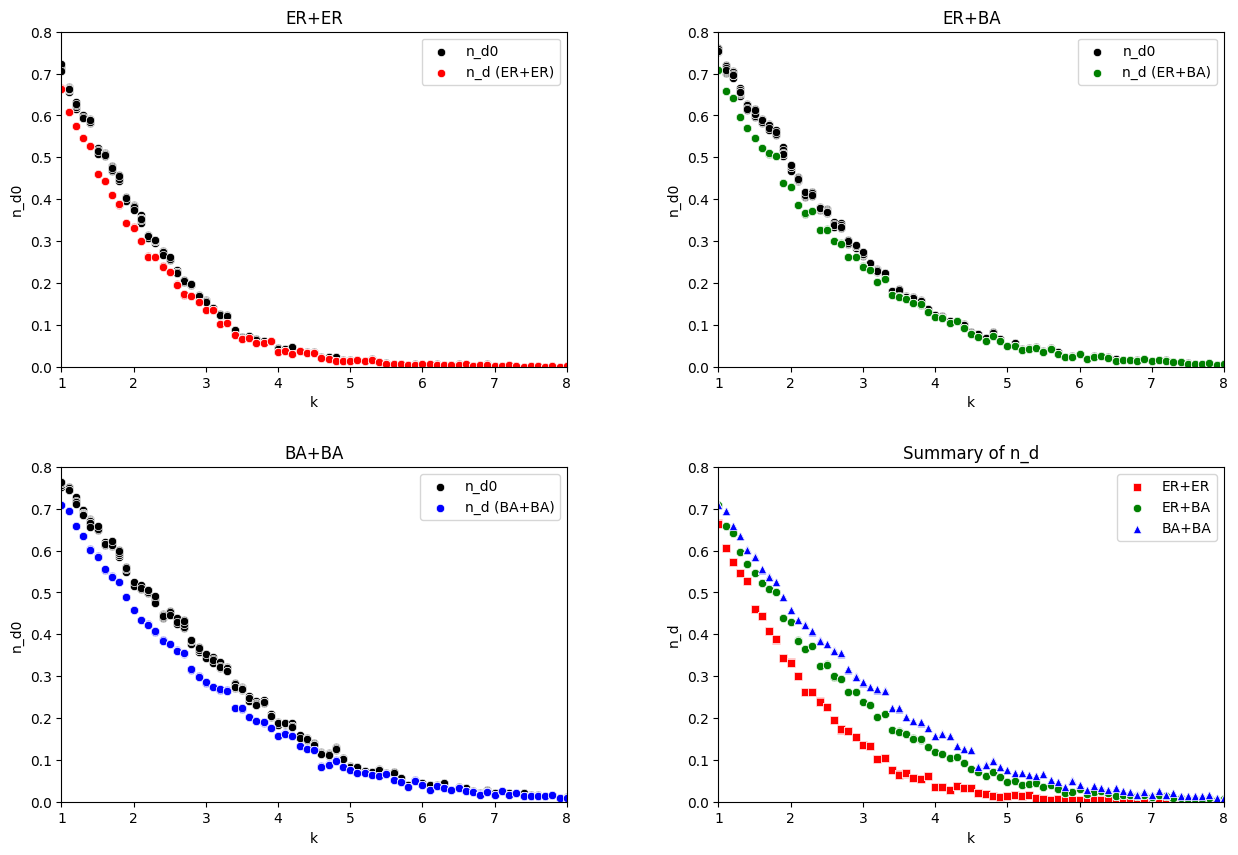

In [32]:
# Perform initial calculations
df["n_d0"] = df["pre_union"] / df["n"]
df["n_d"] = df["union"] / df["n"]

# Filtering data for n = 1000
filtered_data = df[df['n'] == 1000]

# Extracting unique values for type and n for subplot organization
types = ['ER+ER', 'ER+BA', 'BA+BA']
shapes = ['s', 'o', '^']
colors = ['red', 'green', 'blue']

# Setting up the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plotting the first three subplots
for i, graph_type in enumerate(types):
    ax = axes[i // 2, i % 2]
    type_data = filtered_data[filtered_data['type'] == graph_type]
    sns.scatterplot(x='k', y='n_d0', data=type_data, ax=ax, color='black', label='n_d0')
    sns.scatterplot(x='k', y='n_d', data=type_data, ax=ax, color=colors[i], label='n_d (' + graph_type + ')')
    ax.set_xlim(1, 8)
    ax.set_ylim(0, 0.8)
    ax.set_title(graph_type)
    ax.legend()

# Plotting the last subplot for the summary
ax = axes[1, 1]
for i, graph_type in enumerate(types):
    type_data = filtered_data[filtered_data['type'] == graph_type]
    sns.scatterplot(x='k', y='n_d', data=type_data, ax=ax, color=colors[i], marker=shapes[i], label=graph_type)
ax.set_xlim(1, 8)
ax.set_ylim(0, 0.8)
ax.set_title('Summary of n_d')
ax.legend()

plt.show()

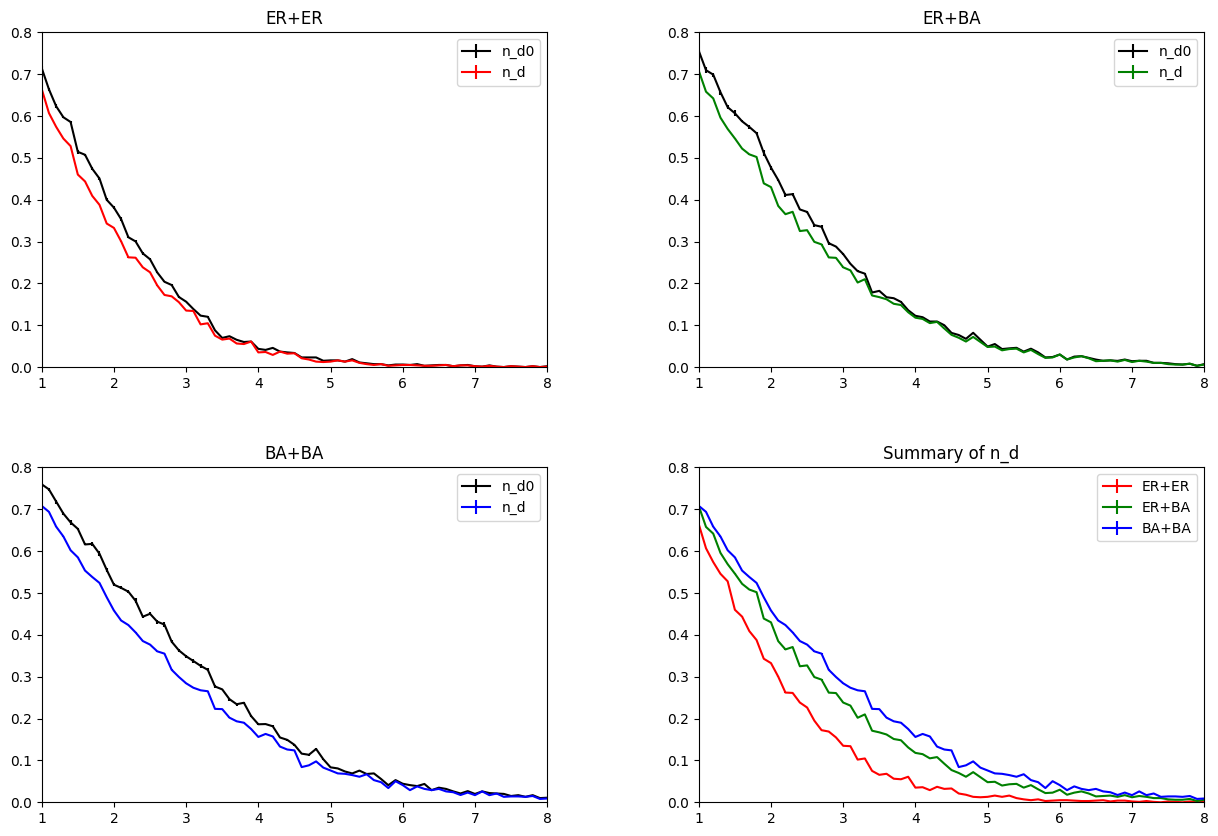

In [36]:
shapes = ['-', '-', '-']

# Grouping data to calculate mean and standard deviation for n_d0 and n_d
grouped_data = filtered_data.groupby(['type', 'n', 'k']).agg({'n_d0': ['mean', 'std'], 'n_d': ['mean', 'std']}).reset_index()

# Setting up the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plotting the first three subplots with error bars
for i, graph_type in enumerate(types):
    ax = axes[i // 2, i % 2]
    type_data = grouped_data[grouped_data['type'] == graph_type]
    
    # Error bars for n_d0
    ax.errorbar(x=type_data['k'], y=type_data['n_d0']['mean'], 
                yerr=type_data['n_d0']['std'], fmt='-', color='black', 
                markersize=5, markeredgewidth=0.2, label='n_d0')
    
    # Error bars for n_d
    ax.errorbar(x=type_data['k'], y=type_data['n_d']['mean'], 
                yerr=type_data['n_d']['std'], fmt='-', color=colors[i], 
                markersize=5, markeredgewidth=0.2, label='n_d')
    ax.set_xlim(1, 8)
    ax.set_ylim(0, 0.8)
    ax.set_title(graph_type)
    ax.legend()

# Plotting the last subplot (summary) with error bars
ax = axes[1, 1]
for i, graph_type in enumerate(types):
    type_data = grouped_data[grouped_data['type'] == graph_type]
    
    # Error bars for n_d
    ax.errorbar(x=type_data['k'], y=type_data['n_d']['mean'], 
                yerr=type_data['n_d']['std'], fmt=shapes[i], color=colors[i], 
                markersize=5, markeredgewidth=0.2, label=graph_type)
ax.set_xlim(1, 8)
ax.set_ylim(0, 0.8)
ax.set_title('Summary of n_d')
ax.legend()

plt.show()

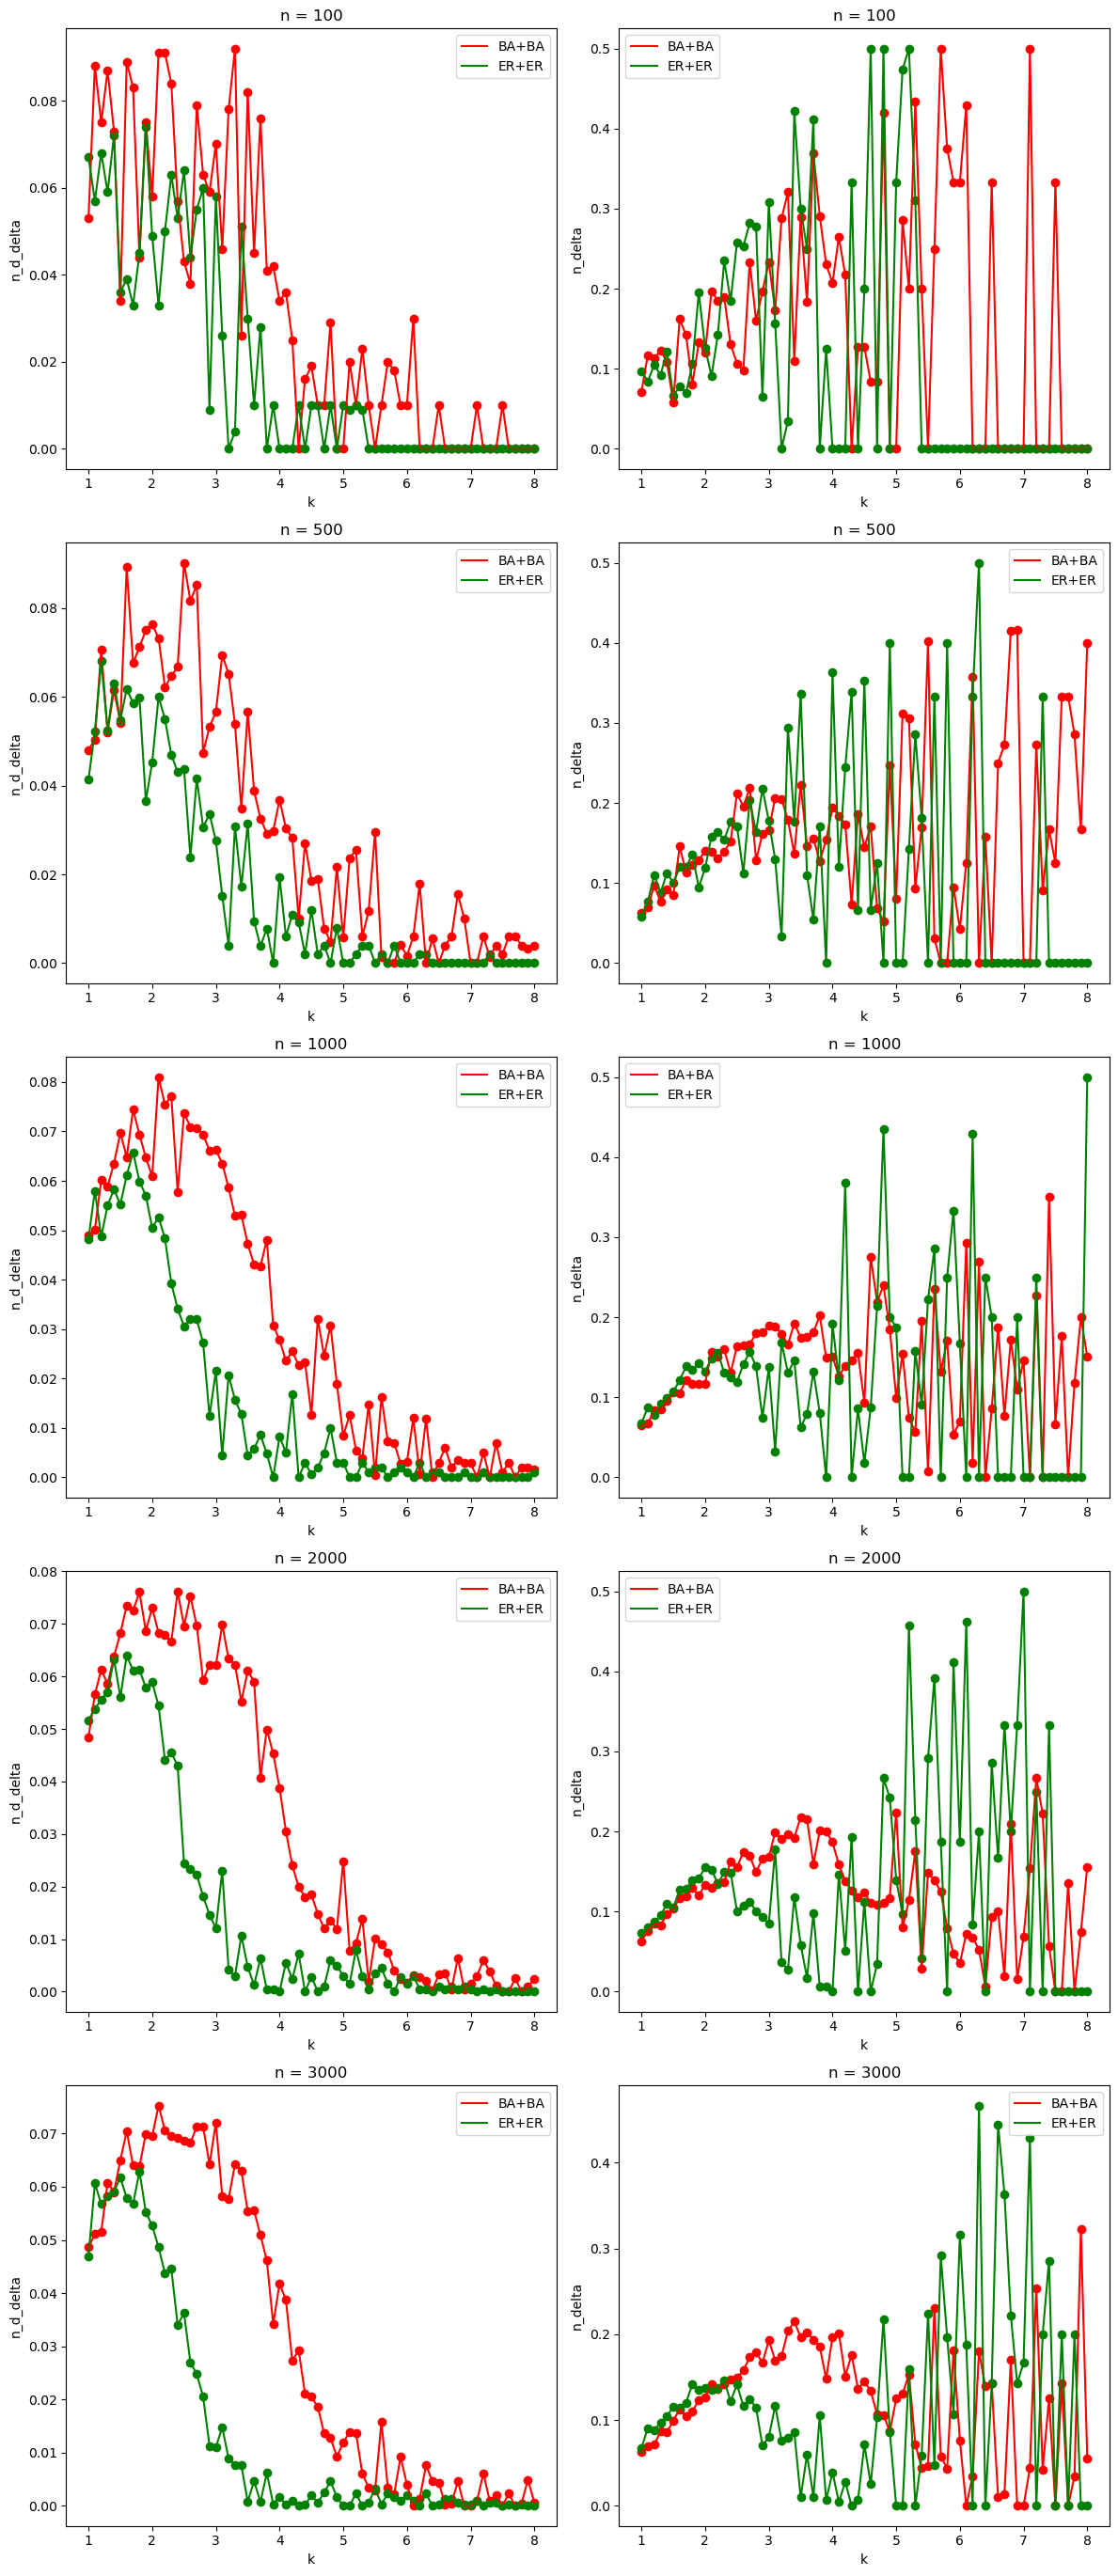

In [ ]:
n_values = agg_df['n'].unique()
fig, axes = plt.subplots(nrows=len(n_values), ncols=2, figsize=(12, 5.5 * len(n_values)))

for row, n_value in enumerate(n_values):
    agg_df_n = agg_df[(agg_df['n'] == n_value ) & (agg_df['type'] != "ER+BA")]

    ax1 = axes[row, 0]
    for i, type_value in enumerate(agg_df_n['type'].unique()):
        df_type = agg_df_n[agg_df_n['type'] == type_value]
        ax1.plot(df_type['k'], df_type['n_d_delta'], color=colors[i], label=type_value)
        ax1.scatter(df_type['k'], df_type['n_d_delta'], color=colors[i])

    ax1.set_title(f'n = {n_value}')
    ax1.set_xlabel('k')
    ax1.set_ylabel('n_d_delta')
    ax1.legend()

    ax2 = axes[row, 1]
    for i, type_value in enumerate(agg_df_n['type'].unique()):
        df_type = agg_df_n[agg_df_n['type'] == type_value]
        ax2.plot(df_type['k'], df_type['n_delta'], color=colors[i], label=type_value)
        ax2.scatter(df_type['k'], df_type['n_delta'], color=colors[i])

    ax2.set_title(f'n = {n_value}')
    ax2.set_xlabel('k')
    ax2.set_ylabel('n_delta')
    ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
with open("assets\\result\\k_gamma.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

type     n    k  gamma  seq  pre_intersection  intersection  \
0       BA+BA   100  1.0    2.0    0                42            48   
1       BA+BA   100  1.0    2.0    1                43            48   
2       BA+BA   100  1.0    2.0    2                44            48   
3       BA+BA   100  1.0    2.0    3                44            48   
4       BA+BA   100  1.0    2.0    4                42            48   
...       ...   ...  ...    ...  ...               ...           ...   
216545  BA+BA  3000  8.0    8.0    5                 0             1   
216546  BA+BA  3000  8.0    8.0    6                 0             1   
216547  BA+BA  3000  8.0    8.0    7                 0             1   
216548  BA+BA  3000  8.0    8.0    8                 0             1   
216549  BA+BA  3000  8.0    8.0    9                 0             1   

        pre_union  union  
0              83     77  
1              82     77  
2              81     77  
3              81     77  
4              83     77  
...           ...    ...  
216545          4      3  
216546          4      3  
216547          4      3  
216548          4      3  
216549          4      3  

[216550 rows x 9 columns]

In [ ]:
agg_columns = ['pre_intersection', 'intersection', 'pre_union', 'union']
grouped = df.groupby(['type', 'n', 'k', 'gamma'])

agg_df = pd.DataFrame()

dfs = []
for name, group in grouped:
    mean = group[agg_columns].mean()
    var = group[agg_columns].var()

    temp_df = pd.DataFrame({
        'type': [name[0]],
        'n': [name[1]],
        'k': [name[2]],
        'gamma': [name[3]],
        'mean_pre_intersection': [mean['pre_intersection']],
        'var_pre_intersection': [var['pre_intersection']],
        'mean_intersection': [mean['intersection']],
        'var_intersection': [var['intersection']],
        'mean_pre_union': [mean['pre_union']],
        'var_pre_union': [var['pre_union']],
        'mean_union': [mean['union']],
        'var_union': [var['union']],
    })

    dfs.append(temp_df)

agg_df = pd.concat(dfs, ignore_index=True)

agg_df["n_d0"] = agg_df["mean_pre_union"] / agg_df["n"]
agg_df["n_d"] = agg_df["mean_union"] / agg_df["n"]

agg_df.head()

type    n    k  gamma  mean_pre_intersection  var_pre_intersection  \
0  BA+BA  100  1.0    2.0                   43.1              1.211111   
1  BA+BA  100  1.0    2.1                   43.6              1.155556   
2  BA+BA  100  1.0    2.2                   43.7              1.788889   
3  BA+BA  100  1.0    2.3                   44.1              2.544444   
4  BA+BA  100  1.0    2.4                   33.2              1.288889   

   mean_intersection  var_intersection  mean_pre_union  var_pre_union  \
0               48.0               0.0            81.9       1.211111   
1               50.0               0.0            84.4       1.155556   
2               47.0               0.0            76.3       1.788889   
3               49.0               0.0            78.9       2.544444   
4               36.0               0.0            80.8       1.288889   

   mean_union  var_union   n_d0   n_d  
0        77.0        0.0  0.819  0.77  
1        78.0        0.0  0.844  0.78  
2        73.0        0.0  0.763  0.73  
3        74.0        0.0  0.789  0.74  
4        78.0        0.0  0.808  0.78

In [ ]:
pivot_table = {}
for n in config.NETWORK_NODES_LIST:
    pivot_table[n] = agg_df[agg_df["n"] == n].pivot(index='k', columns='gamma', values='n_d')
pivot_table[100]

gamma    2.0    2.1    2.2   2.3    2.4    2.5   2.6    2.7   2.8    2.9  ...  \
k                                                                         ...   
1.0    0.770  0.780  0.730  0.74  0.780  0.791  0.68  0.720  0.70  0.730  ...   
1.1    0.790  0.780  0.750  0.69  0.724  0.700  0.68  0.740  0.71  0.625  ...   
1.2    0.760  0.730  0.750  0.70  0.710  0.750  0.68  0.630  0.65  0.660  ...   
1.3    0.741  0.750  0.710  0.70  0.660  0.670  0.64  0.620  0.59  0.640  ...   
1.4    0.713  0.690  0.693  0.65  0.650  0.660  0.61  0.593  0.61  0.550  ...   
..       ...    ...    ...   ...    ...    ...   ...    ...   ...    ...  ...   
7.6    0.150  0.100  0.060  0.04  0.020  0.030  0.01  0.000  0.02  0.000  ...   
7.7    0.150  0.110  0.040  0.02  0.020  0.010  0.03  0.010  0.02  0.020  ...   
7.8    0.190  0.080  0.020  0.03  0.020  0.020  0.02  0.010  0.02  0.010  ...   
7.9    0.160  0.060  0.050  0.04  0.010  0.010  0.02  0.020  0.02  0.010  ...   
8.0    0.110  0.071  0.030  0.03  0.030  0.020  0.01  0.000  0.00  0.010  ...   

gamma   7.1   7.2   7.3   7.4   7.5   7.6   7.7    7.8   7.9    8.0  
k                                                                    
1.0    0.67  0.62  0.68  0.68  0.67  0.62  0.66  0.650  0.64  0.620  
1.1    0.70  0.58  0.61  0.59  0.64  0.65  0.62  0.600  0.62  0.580  
1.2    0.58  0.53  0.60  0.57  0.58  0.56  0.61  0.550  0.61  0.600  
1.3    0.52  0.55  0.53  0.55  0.57  0.50  0.49  0.540  0.55  0.570  
1.4    0.49  0.53  0.50  0.47  0.51  0.55  0.49  0.524  0.53  0.482  
..      ...   ...   ...   ...   ...   ...   ...    ...   ...    ...  
7.6    0.00  0.00  0.01  0.02  0.00  0.00  0.00  0.000  0.00  0.000  
7.7    0.01  0.01  0.00  0.01  0.00  0.00  0.00  0.000  0.01  0.000  
7.8    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.010  0.00  0.000  
7.9    0.00  0.00  0.00  0.00  0.01  0.00  0.00  0.000  0.00  0.000  
8.0    0.00  0.00  0.01  0.00  0.02  0.00  0.00  0.000  0.00  0.000  

[71 rows x 61 columns]

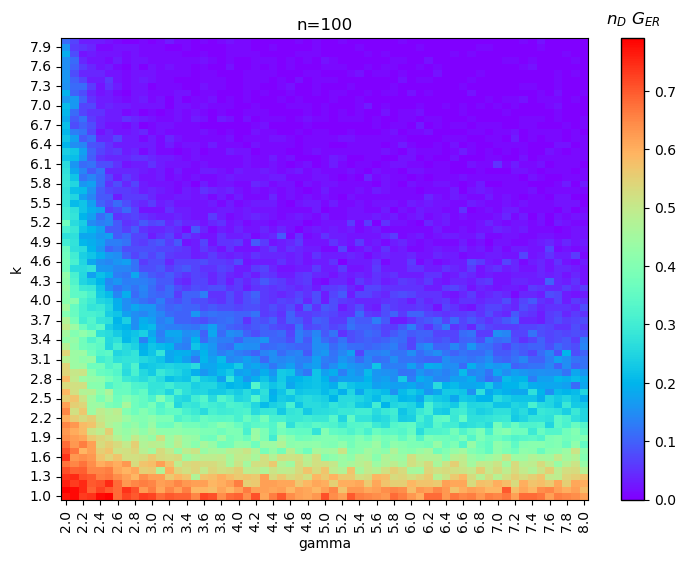

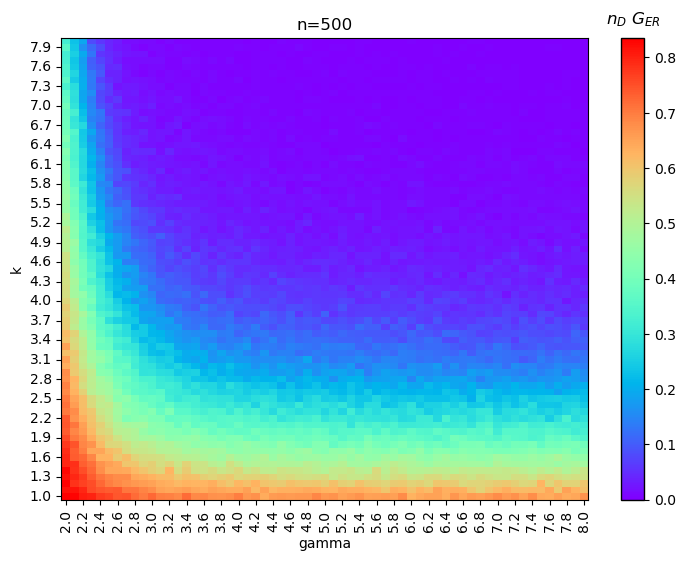

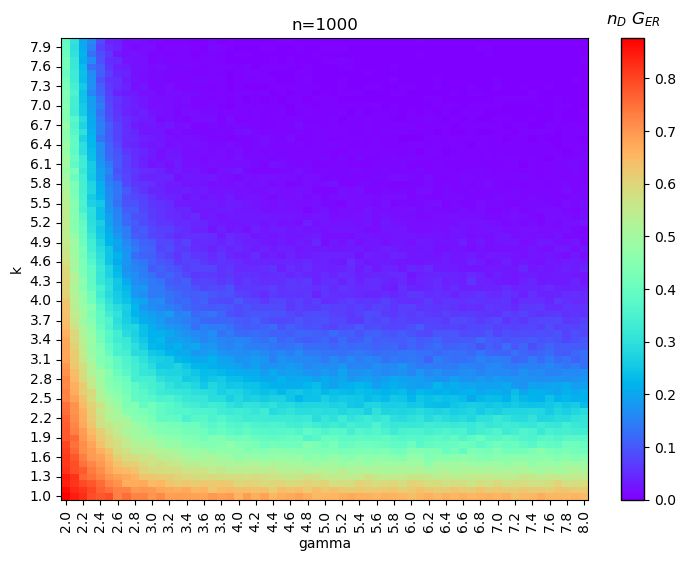

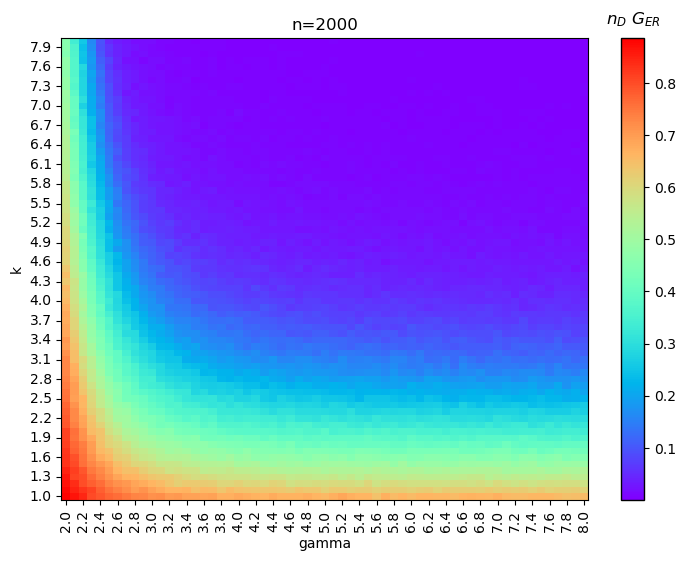

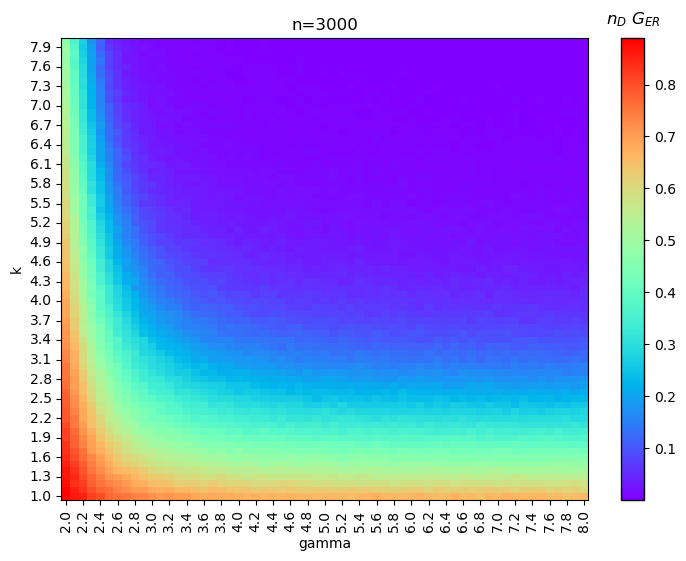

In [ ]:
for n in config.NETWORK_NODES_LIST:
    plt.figure(figsize=(8.5, 6))
    ax = sns.heatmap(pivot_table[n], cmap="rainbow", cbar=False)
    plt.title(f"n={n}")
    plt.ylabel("k")
    plt.xlabel("gamma")
    plt.gca().invert_yaxis()  # Inverting the y-axis

    # Adding a border to the outer edge of the heatmap
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')

    # Adding an external colorbar with a border
    cbar = ax.figure.colorbar(ax.collections[0], ax=ax, use_gridspec=True)
    cbar.ax.set_title(r'$n_D\ G_{ER}$', pad=10)
    cbar.outline.set_visible(True)  # Enabling the border of the colorbar
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(1)
    
    plt.show()

In [38]:
with open("assets/result/diff_k.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

type     n   k1   k2  MDS1  MDS2  pre_intersection  intersection  \
0      ER+ER  1000  1.0  1.0   451   472               205           259   
1      ER+ER  1000  1.0  1.1   451   418               185           239   
2      ER+ER  1000  1.0  1.2   451   380               162           217   
3      ER+ER  1000  1.0  1.3   451   364               168           217   
4      ER+ER  1000  1.0  1.4   451   352               148           203   
...      ...   ...  ...  ...   ...   ...               ...           ...   
15118  ER+BA  1000  8.0  7.6     1     6                 0             0   
15119  ER+BA  1000  8.0  7.7     1     6                 0             0   
15120  ER+BA  1000  8.0  7.8     1     7                 0             0   
15121  ER+BA  1000  8.0  7.9     1     3                 0             1   
15122  ER+BA  1000  8.0  8.0     1     6                 0             1   

       pre_union  union  
0            718    664  
1            684    630  
2            669    614  
3            647    598  
4            655    600  
...          ...    ...  
15118          7      7  
15119          7      7  
15120          8      8  
15121          4      3  
15122          7      6  

[15123 rows x 10 columns]

In [39]:
df["n_d0"] = df["pre_union"] / df["n"]
df["n_d"] = df["union"] / df["n"]
df["n_d1"] = df["MDS1"] / df["n"]
df["n_d2"] = df["MDS2"] / df["n"]

In [ ]:
df_er = df[df["type"] == "ER+ER"].pivot(index='k1', columns='k2', values='n_d')
df_ba = df[df["type"] == "BA+BA"].pivot(index='k1', columns='k2', values='n_d')
df_mix = df[df["type"] == "ER+BA"].pivot(index='k1', columns='k2', values='n_d')
df_k = df[df["k1"] == df["k2"]]
df_k

type     n   k1   k2  MDS1  MDS2  pre_intersection  intersection  \
0      ER+ER  1000  1.0  1.0   451   472               205           259   
72     ER+ER  1000  1.1  1.1   425   418               188           236   
144    ER+ER  1000  1.2  1.2   387   380               146           193   
216    ER+ER  1000  1.3  1.3   359   364               125           177   
288    ER+ER  1000  1.4  1.4   352   352               121           176   
...      ...   ...  ...  ...   ...   ...               ...           ...   
14834  ER+BA  1000  7.6  7.6     1     6                 0             1   
14906  ER+BA  1000  7.7  7.7     0     6                 0             0   
14978  ER+BA  1000  7.8  7.8     1     7                 0             0   
15050  ER+BA  1000  7.9  7.9     0     3                 0             0   
15122  ER+BA  1000  8.0  8.0     1     6                 0             1   

       pre_union  union   n_d0    n_d   n_k1   n_k2  
0            718    664  0.718  0.664  0.451  0.472  
72           655    607  0.655  0.607  0.425  0.418  
144          621    574  0.621  0.574  0.387  0.380  
216          598    546  0.598  0.546  0.359  0.364  
288          583    528  0.583  0.528  0.352  0.352  
...          ...    ...    ...    ...    ...    ...  
14834          7      6  0.007  0.006  0.001  0.006  
14906          6      6  0.006  0.006  0.000  0.006  
14978          8      8  0.008  0.008  0.001  0.007  
15050          3      3  0.003  0.003  0.000  0.003  
15122          7      6  0.007  0.006  0.001  0.006  

[213 rows x 14 columns]

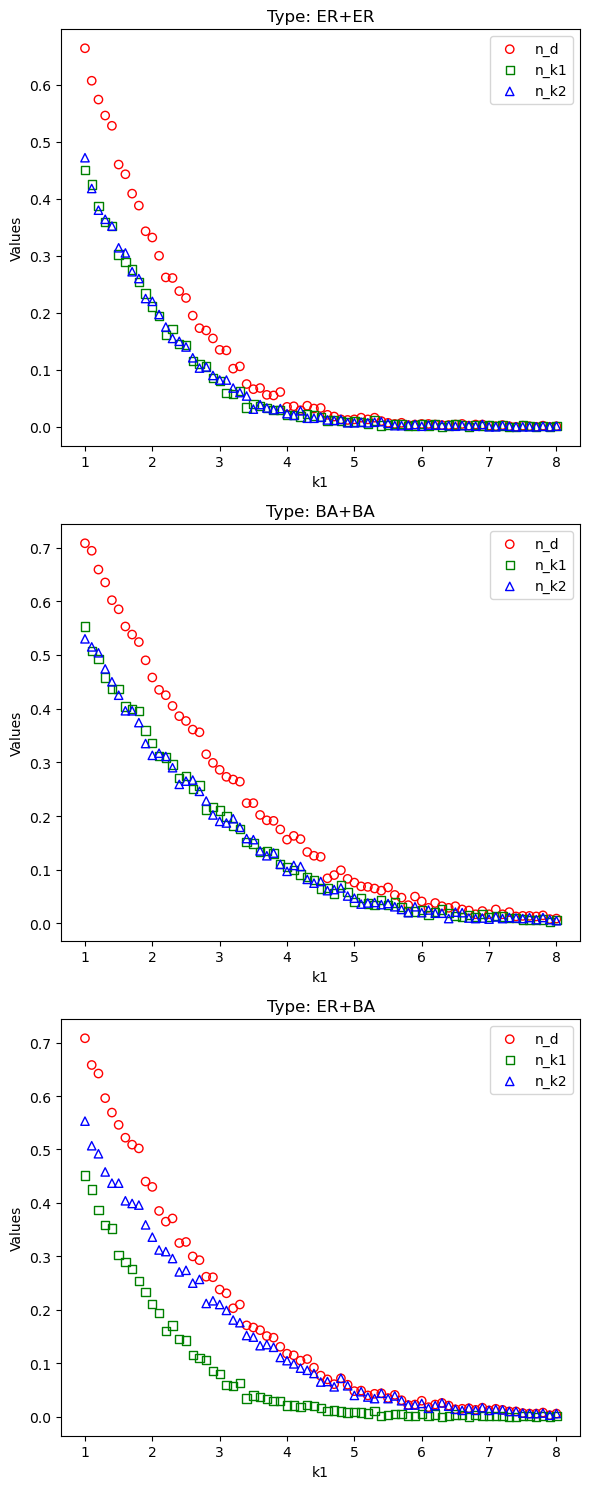

In [ ]:
fig, axes = plt.subplots(nrows=len(df['type'].unique()), ncols=1, figsize=(6, 15))

for i, type_value in enumerate(df_k['type'].unique()):
    ax = axes[i]
    df_k_type = df_k[df_k['type'] == type_value]

    for j, col in enumerate(["n_d", "n_d1", "n_d2"]):
        ax.scatter(df_k_type['k1'], df_k_type[col], marker=shapes[j], facecolors='none', edgecolors=colors[j], label=col)
    
    ax.set_title(f'Type: {type_value}')
    ax.set_xlabel('k1')
    ax.set_ylabel('Values')
    ax.legend()

plt.tight_layout()
plt.show()

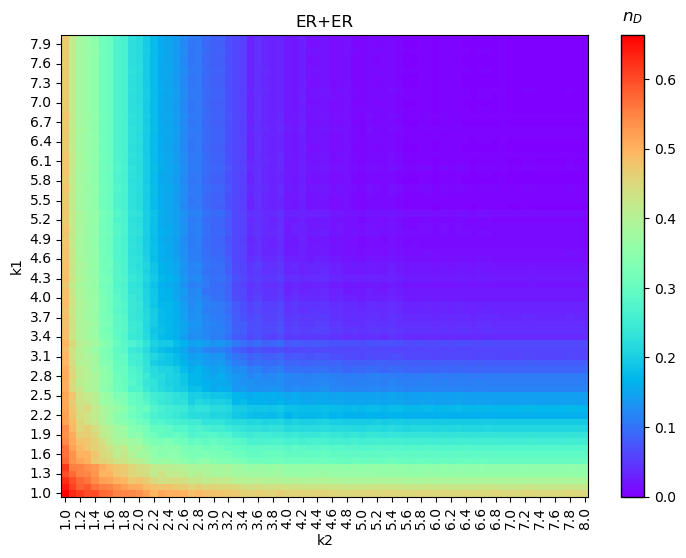

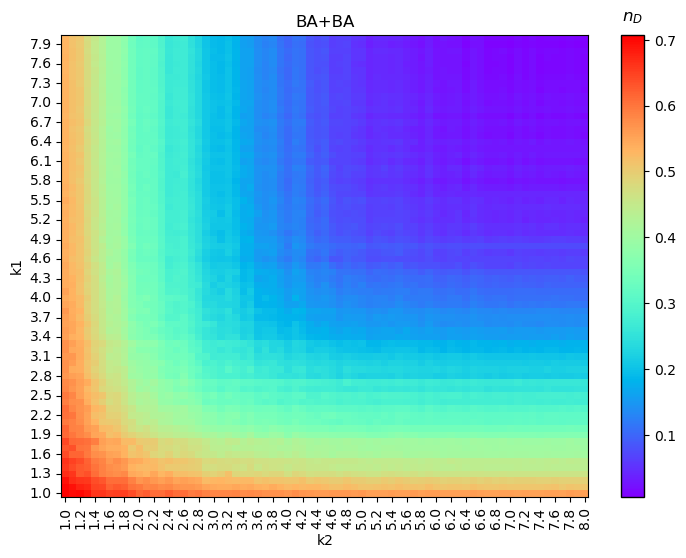

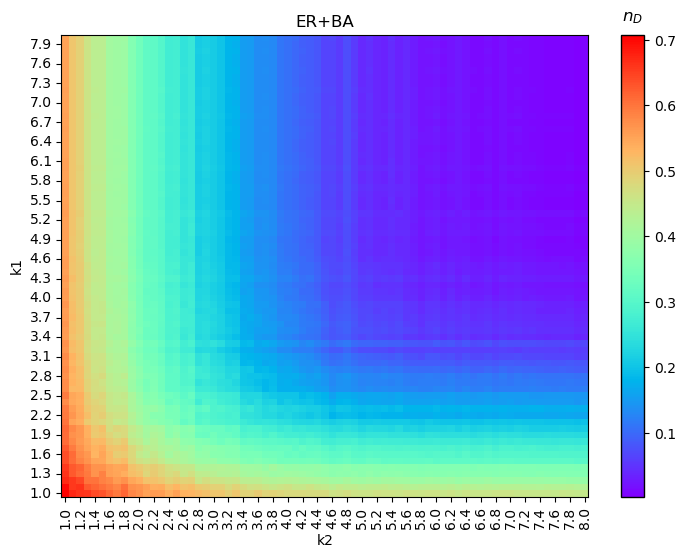

In [ ]:
for name, df in zip(["ER+ER", "BA+BA", "ER+BA"], [df_er, df_ba, df_mix]):
    plt.figure(figsize=(8.5, 6))
    ax = sns.heatmap(df, cmap="rainbow", cbar=False)
    plt.title(f"{name}")
    plt.ylabel("k1")
    plt.xlabel("k2")
    plt.gca().invert_yaxis()  # Inverting the y-axis

    # Adding a border to the outer edge of the heatmap
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')

    # Adding an external colorbar with a border
    cbar = ax.figure.colorbar(ax.collections[0], ax=ax, use_gridspec=True)
    cbar.ax.set_title(r'$n_D$', pad=10)
    cbar.outline.set_visible(True)  # Enabling the border of the colorbar
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(1)

    plt.show()